In [95]:
import numpy as np
import pandas as pd

In [96]:
df=pd.read_csv('spam.csv')

In [97]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df.shape

(5572, 2)

In [99]:
## 1.Data Cleaning

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [103]:
df.sample(5)

,Category,Message
5277,ham,"Best msg: It's hard to be with a person, when ..."
3690,ham,You still coming tonight?
3260,spam,Congratulations! Thanks to a good friend U hav...
4147,ham,I cant wait for cornwall. Hope tonight isnt ...
1976,ham,Delhi and chennai still silent.


In [105]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [108]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [111]:
df['Category']=encoder.fit_transform(df['Category'])

In [112]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
#missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [114]:
#duplicates values
df.duplicated().sum()

415

In [115]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [116]:
df.shape

(5157, 2)

In [18]:
##2.EDA

In [117]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

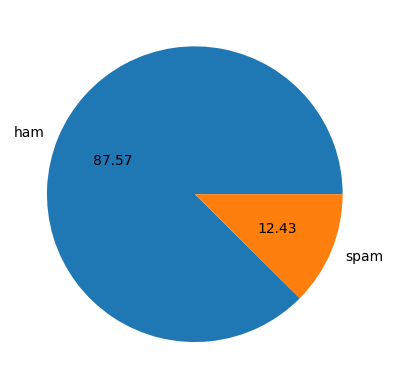

In [119]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# data is imbalance

In [120]:
import nltk

In [121]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHUTOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
df['num_characters']=df['Message'].apply(len) ## character used in text column

C:\Users\ASHUTOSH\AppData\Local\Temp\ipykernel_10060\1272710359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Message'].apply(len) ## character used in text column


In [125]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [126]:
#num of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ASHUTOSH\AppData\Local\Temp\ipykernel_10060\976439678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [127]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [128]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ASHUTOSH\AppData\Local\Temp\ipykernel_10060\2232715112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [129]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [130]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [131]:
df[df['Category']==0]

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [132]:
##ham messages
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [133]:
##spam messages
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [134]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

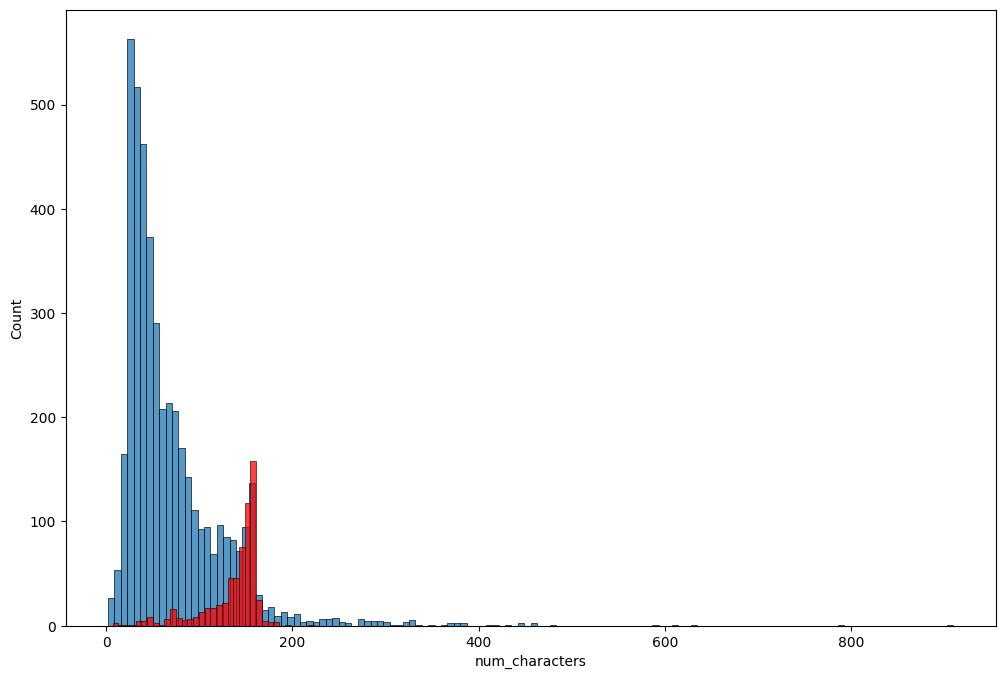

In [135]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

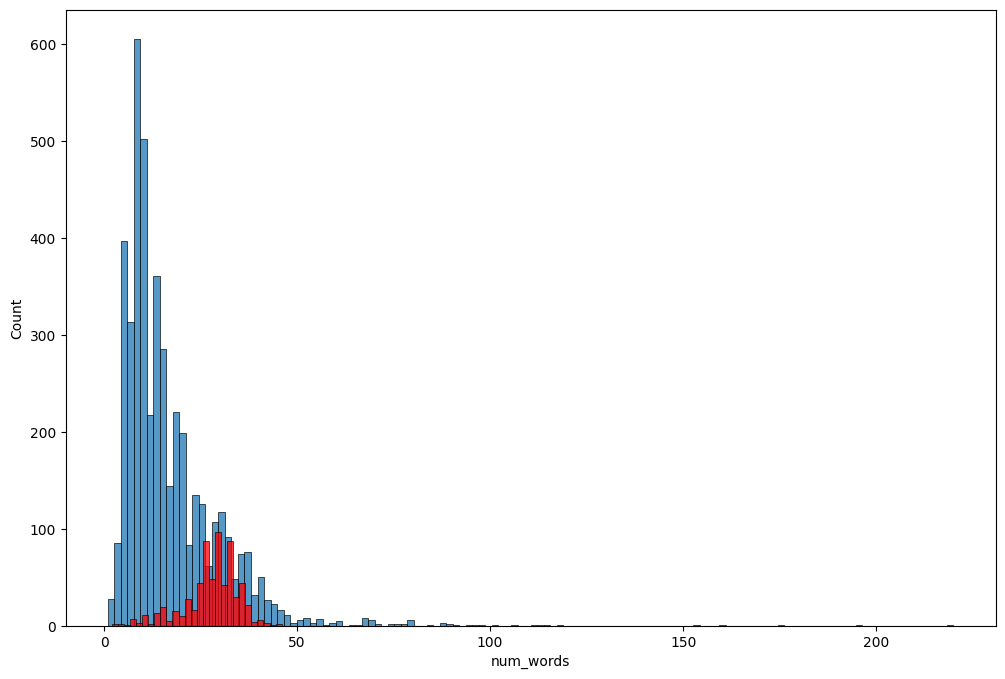

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\ASHUTOSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


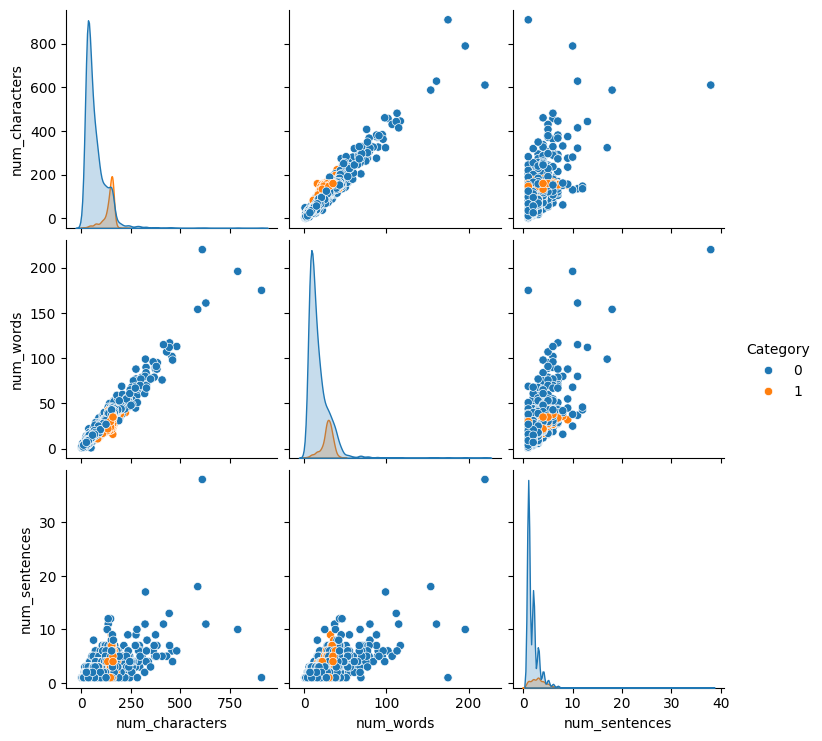

In [136]:
sns.pairplot(df,hue='Category')

In [137]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

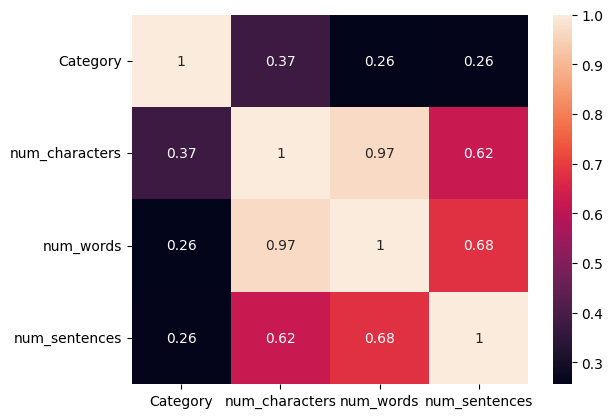

In [139]:
sns.heatmap(df[['Category', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

In [41]:
##Data preprocessing


In [140]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)## text is converted into list
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [141]:
 from nltk.corpus import stopwords
#  stopwords.words('english')

In [142]:
 import string
# string.punctuation

In [143]:
transform_text('i loved yt lecturing on machine learning how do you?')

'love yt lectur machin learn'

In [144]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')



'love'

In [145]:
df['transformed_text']=df['Message'].apply(transform_text)

C:\Users\ASHUTOSH\AppData\Local\Temp\ipykernel_10060\1616590388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Message'].apply(transform_text)


In [146]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [149]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

KeyError: 'target'

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

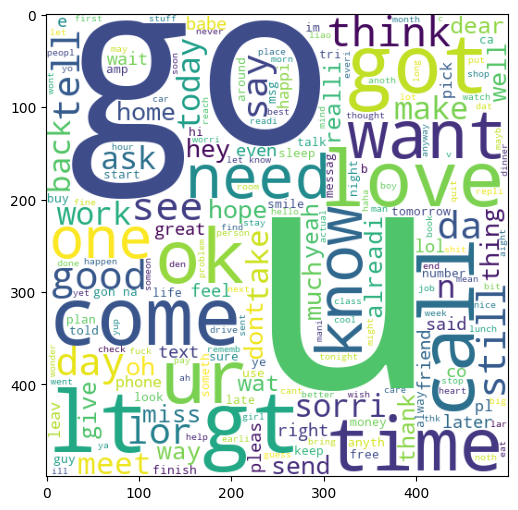

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [150]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
spam_corpus=[]
for message in df[df['Category']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
        
        

In [154]:
len(spam_corpus)

9781

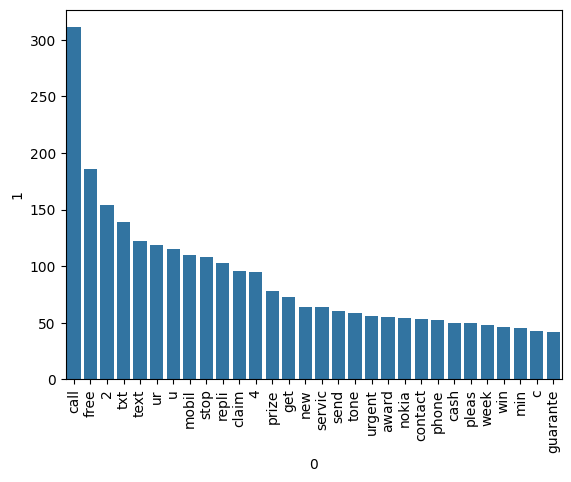

In [155]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [158]:
ham_corpus=[]
for message in df[df['Category']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)
        
        

In [159]:
len(ham_corpus)

35940

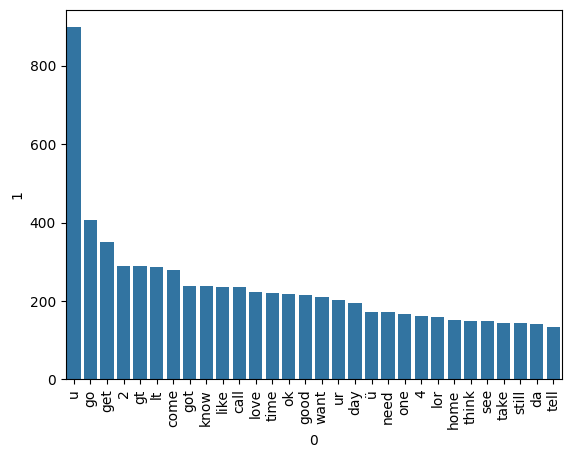

In [160]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [161]:
##4 model building

In [162]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [163]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()

In [164]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [165]:
X.shape

(5157, 3000)

In [167]:
y=df['Category'].values

In [168]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [171]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [172]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [173]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [174]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [175]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [77]:
#tfidf--->mnb


In [78]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [178]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [180]:

train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9757751937984496, 0.9811320754716981)

In [181]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0


C:\Users\ASHUTOSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714


In [182]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [183]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.972868,0.971429
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [184]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [185]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.972868
7,AdaBoost,Accuracy,0.966085
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.920620,1.000000,0.920620,1.000000
1,NB,0.971926,0.989362,0.971926,0.989362
2,SVC,0.978703,0.980583,0.978703,0.980583
3,ETC,0.977735,0.980392,0.977735,0.980392
4,RF,0.972894,0.979381,0.972894,0.979381
5,GBDT,0.953533,0.939759,0.953533,0.939759
6,LR,0.955470,0.931034,0.955470,0.931034
7,AdaBoost,0.962246,0.927083,0.962246,0.927083
8,xgb,0.967086,0.914286,0.967086,0.914286
9,BgC,0.964182,0.868421,0.964182,0.868421


In [186]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(rfc,open('model1.pkl','wb'))